# MEGA BLOG POST - Natural Language Processing

This notebook endeavors a long-term effort of mine, to be the ultimate guide to standard Web Mining and NLP problems, for reference for developers.

---------------------------------------------------------------------------

Who am I? 

I'm a Former Intern at Cisco and Deloitte. 

I'm a published algorithm blogger on Topcoder, and I run my own personal blog on Algorithms too. (So I'm no stranger to technical writing 😉)  

I frequently compete in programming contests. I'm a computer science undergrad who loves programming.

You can find more of me here -
* My Linkedin - https://www.linkedin.com/in/adityaramesh1998
* My Portfolio Website and Contact - https://www.rameshaditya.com/
* My GitHub Profile - https://www.github.com/RameshAditya/

**This notebook will also be uploaded on my GitHub Profile, so you might want to hit "star" and "watch" to stay tuned for updates on GitHub. ** 🙂

Do follow me on GitHub and connect with me on LinkedIn to follow me for more of my work! 🙂

---------------------------------------------------------------------------

You could support me in making more work like this by buying me coffee. 

<a href="https://www.buymeacoffee.com/adityaramesh" target="_blank"><img src="https://www.buymeacoffee.com/assets/img/custom_images/orange_img.png" alt="Buy Me A Coffee" style="height: auto !important;width: auto !important;" ></a>


(*No seriously, I'd like some <strike>coffee</strike> support.* 😛)


Current contents include (in suggested order of reading) -
* [Web Scraping - Extracting Text From Target Website](#Web-Scraping---Extracting-Text-From-Target-Website)


* [Tokenizing](#Tokenizing)


* [Stopword Removal](#Stopword-Removal)


* [Stemming Text](#Word-Stemming)


* [Document Representation](#Document-Representation)
    - [Boolean Matrix](#Boolean-Matrix)
    - [Term Frequency Matrix (Bag Of Words Model)](#Term-Frequency-Matrix-or-Bag-Of-Words-Model)
    - [Complete Representation](#Complete-Representation)
    

* [IDF and TF-IDF](#IDF-and-TF-IDF)


* [Similarity](#Similarity)
    - [Euclidean Similarity](#Euclidean-Similarity)
    - [Cosine Similarity](#Cosine-Similarity)
    
    
* [Classification](#Classification)
    - [Naive Bayes Classifier](#Naive-Bayes-Classifier)


* [Clustering](#Clustering)
    - [Hierarchical Clustering](#Hierarchical-Clustering)
    
Coming up soon -
 * K-Means Clustering
 * Latent Semantic Indexing
 * Singular Value Decomposition
 * PageRank for Text
 * Text Summarization

--------------------------------------------------------------------------

## Web Scraping - Extracting Text From Target Website

This is pretty important because in practical use, often you'll find yourself extracting information from websites or other sources as you can't always count on having a neat, clean dataset handed to you.

First, we start by importing the modules we'll need.

In [40]:
import sys
import urllib.request
from bs4 import BeautifulSoup

Then we define our target website.

In [50]:
target_website = 'http://www.php.net'
response = urllib.request.urlopen(target_website)

Now that we have the response from the target website, we need to extract the text out of this.

In [51]:
html = response.read() #read the response sent from the target website
soup = BeautifulSoup(html, "html5lib") #instantiate beautifulsoup object
text = soup.get_text(strip = True) #extract the text
print(text[:500])

PHP: Hypertext PreprocessorDownloadsDocumentationGet InvolvedHelpGetting StartedIntroductionA simple tutorialLanguage ReferenceBasic syntaxTypesVariablesConstantsExpressionsOperatorsControl StructuresFunctionsClasses and ObjectsNamespacesErrorsExceptionsGeneratorsReferences ExplainedPredefined VariablesPredefined ExceptionsPredefined Interfaces and ClassesContext options and parametersSupported Protocols and WrappersSecurityIntroductionGeneral considerationsInstalled as CGI binaryInstalled as an


## Tokenizing

Now, to process any sort of text, its important to "tokenize" the data. This basically means that we need to split the data into the words it consists of.

For example, the text "Aditya loves writing code", after tokenizing, becomes ["Aditya", "loves", "writing", "code"]

It's the mere splitting up of text into words. But nevertheless, there exists an NLTK library for it. :)

In [5]:
from nltk.tokenize import word_tokenize

text = 'Aditya loves writing code'

tokenized_text = word_tokenize(text)

print(tokenized_text)

['Aditya', 'loves', 'writing', 'code']


And that's as simple as tokenizing gets.

----------------------

## Stopword Removal

Often its convenient to strip extremely common words from one's text corpus as very rarely do these words add any value to the information mining or retrieval process.

These words are called stopwords. Examples include "a", "an", "the", "in" etc. Most queries retain their meaning even after stopword removal and are more "content" rich after this.

Lucky for us, there's an NLTK module that consists of generally accepted stopwords so we will simply leverage this.

In [2]:
from nltk.corpus import stopwords

And there we have it! Now to determine what english words are stopwords, we execute the following.

In [4]:
stop_words = list(stopwords.words('english'))
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

So, now that we have our stopwords, we can remove them from any text corpus we have, and perhaps this may improve our model's accuracy. But more on that later!

Okay, so now that we've removed our stopwords from our text corpus, there's still another factor that remains.

The word's root.

I'll explain with an example -

Let's say you want to build the next Google - or any information retrieval system. 

Now, if one were to search for "Boy waiting with dog", an article titled "Boys wait with dogs" may be relevant. So how do we get an algorithm that recognizes this? Stemming.

-----------------------------------------------


## Word Stemming

After stemming, our text corpus transforms from a set of words, to a set of terms. The difference between a word and a term is that a term is a meaningful entity in our text corpus. Words refer to the unfiltered dataset, while terms are the essence of it on which we make intelligent decisions.

But we're getting ahead of ourselves - firstly, what is stemming?

"Stemming" as the name suggests, is the idea of removing all excess parts of the word until you're left with the root of the word.

Most english words have many variations - for example, the root word "wait" has "waiting", "waited", "waits" all as variants.

In order to compress these multiple possibilities, we stem the words down to their root forms so that we can compare the words directly.

In [16]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

sentence_1 = 'Boy waiting with dog'
sentence_1 = word_tokenize(sentence_1)
sentence_1 = [i for i in sentence_1 if not i in list(stopwords.words('english'))]

sentence_2 = 'Boys wait with dogs'
sentence_2 = word_tokenize(sentence_2)
sentence_2 = [i for i in sentence_2 if not i in list(stopwords.words('english'))]


PS = PorterStemmer()

stemmed_sentence_1 = ''
stemmed_sentence_2 = ''

for i in sentence_1:
    stemmed_sentence_1 += PS.stem(i) + ' '

for i in sentence_2:
    stemmed_sentence_2 += PS.stem(i) + ' '

print('STEMMED SENTENCE 1:',stemmed_sentence_1, '\nSTEMMED SENTENCE 2:', stemmed_sentence_2)

STEMMED SENTENCE 1: boy wait dog  
STEMMED SENTENCE 2: boy wait dog 


Look at that! Both those sentence resolve down to one root sentence! Of course, this required prior tokenizing AND stopword removal. 

Now we move on to the next topic -- Document Representation!

---------------------


## Document Representation

### Boolean Matrix

The boolean matrix is a simple way of representing a set of documents where each document has some text of its own.

It represents this information in a table where each row defines a separate document, and each column defines the presence or absence of a specific **TERM**.

So basically, collect all the terms, build a table with *D* number of rows (*D* = number of documents) and T number of columns (*T* = Number of terms)

Then, for every *i*th row and *j*th column, if term *Tj* is present in document *Di*, mark 1, else mark 0.

While this representation is quite handy in performing boolean queries, such as "Find all documents that have term A AND term B but NOT term C OR term D", it's limitations are many.

There problems with this representation are -
* Takes up a lot of space = O(T\*D)
* No information on frequency of terms per document.
* No information on order of terms in a document.

**As an example to illustrate its weakness, consider the results if one of the documents in your dataset was the English Oxford Dictionary. RIP Information Retrieval Accuracy, with this method.**

So the next method!

### Term Frequency Matrix or Bag Of Words Model

Similar to Boolean Matrix except here we don't use a '1' or '0' notation -- instead, for every *i*th row and *j*th column, if term *Tj* is present in document *Di*, mark the frequency of *Tj* in *Di*, else mark 0.

This gives us information on how many TIMES a certain term has appeared in a document, and thus it helps us rank documents on a relevance scale.

This is critical in information querying and retrieval as otherwise we may not be able to decipher which document is most similar to a query.

The problem of lack of order of terms still is present - but we'll find ways to get around that.

### Complete Representation

This is the ultimate method of representing documents. It's practically overpowered - this method stores both the frequency of terms for every document, and ALSO the indexes at which the term *Tj* occurs at document *Di*.

The space complexity for this is O(sum of total terms in all documents) as every index corresponds to a term, and therefore the space taken by this model is much higher than anything else we've seen so far.

But the cool thing about this is that with just this table it's possible to fully reproduce the initial documents so there is absolutely NO information loss.

-------------------------------------------------



## IDF and TF-IDF

IDF, stands for Inverse-Document-Frequency. The idea behind IDF is that sometimes, very frequent words may be irrelevant as we may be looking for a document highly specialized. It's similar to stopwords, except that the IDF helps us find our supposed stopwords in context to our query topic.

For example, if one were to query "Algorithms", its likely that most resultant documents will contain the term "computer" so that term doesn't really contribute much with respect to other technical phrases like "Data Structures" or "Time complexity" etc.

So we weight the terms by their importance, during TF-IDF (Term Frequency and Inverse Document Frequency) as an attempt to identify specialized documents in the niche.

I'll skip the mathematics, but in summary, 

```code
IDF = log2( total number of documents / (1 + number of documents that contain a given term) )
```

Thus, your end result will be a vector of length |T| (number of terms), with a floating point value at each index denoting the IDF value of that corresponding term at the same index.

Here's how that looks in implementation.

In [17]:
import math

def term_frequency(term, document):
    """Here we return the number of times the parameter term appears in the parameter document"""
    return document.count(term)

def documents_containing_term(term, all_documents):
    """Here we return the number of documents that contain the given term
    all_documents is a list of documents comprising of the text of each document in each index"""
    return sum([1 for document in all_documents if term in document])

def idf(term, all_documents):
    """Calculates the IDF value of the given term"""
    return math.log( len(all_documents) / (1 + documents_containing_term(term, all_documents)) )

Now that we can calculate IDF values for each term, we weight the terms with their term frequency.

We do this with TF-IDF, and the TF-IDF for a given term *Tj* in a document *Di* is calculated as -

```code
TF-IDF(*Tj*, *Di*) = TF(*Tj*, *Di*) * IDF(*Tj*)
```

And with that we can successfully weight our terms!

Here's how that looks in code.

In [18]:
def tfidf(term, document, all_documents):
    """Method to return TF-IDF of a given term in a given document"""
    return tf(term, document) * idf(term, all_documents)

Now that we can successfully weight our terms, we're done with manipulating our text corpus (for now).

Next follows, the concept of similarity.

## Similarity

Similarity is the idea of comparing two queries or sentences and determining how similar the two are. Ideally, you'd want to retrieve MOST similar results when given a query, right?

Well, similarity helps you quantify this in numbers and we do this using the **Vector Space Model**.

The idea is very simple if you read this next part slowly.

*Start of important part.*

Each sentence, is treated as a vector. Yes, I'm talking about the math, geometry vector.

The co-ordinates of the vector are obtained by taking the term frequencies, as each term represents a dimension.

Let me repeat that - **Each term represents a dimension.**

Two terms would mean two dimensions (X and Y).

Three terms would mean three dimensions (X, Y and Z).

So let's say you have 2 sentences (after tokenizing, stemming and stopword removal) -
* aditya play dog
* aditya study

Now, the terms here are (Aditya, play, dog, study). Let's sort them just to normalize them.

The terms after sorting, are (aditya, dog, play, study).

Now we can plot the two sentences in a 4-dimensional graph, by taking the coordinates from the term frequencies.

Meaning, sentence 1 "aditya play dog" will have the coordinates (1, 1, 1, 0)

And sentence 2 "aditya study" will have the coordinates (1, 0, 0, 1)

**NOTE: This is term frequency. Not binary representation. If there were two terms in a sentence, the coordinate for that term would be 2. Not 1.**

*End of important part. Congrats.*

So now that we've represented our sentences (or text corpuses, i.e. documents) as vectors, we can find how similar they are in a few ways. The most common are -

* [Euclidean Similarity](#Euclidean-Similarity)
* [Cosine Similarity](#Cosine-Similarity)

### Euclidean Similarity

Literally. The. Euclidean. Distance. Formula.

Given two points in an N-dimensional space, the distance between them is the square root of the sum of the difference of their squares.

![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/795b967db2917cdde7c2da2d1ee327eb673276c0)

**NOTE: In the case of Euclidean Similarity, the smaller the value, the better as the two points must be closer.**

### Cosine Similarity

Literally. The. Dot. Product. Formula.

Here we just take the dot product to see how similar the two vectors are, as the dot product produces a representation of one vector on the other.

Here we just multiply the term frequency

![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/5bd0b488ad92250b4e7c2f8ac92f700f8aefddd5)

**NOTE: In the case of Cosine Similarity, the larger the value, the better as the cosine function is decreasing, and secondly, the larger the value is, the closer the two points must be as the representation of one on the other is still large.** 

-----------------------------------

Well, now that we know how to manipulate documents, generate vectors, and even compare similarity between queries and documents - **We know enough to build a basic information retrieval system! Rejoice!**

Now, moving further.

A common task in NLP is classification.

Now, classification is an umbrella term that covers many topics such as spam detection, credit card fraud analysis, sentiment analysis, and many more.

So it's important to be able to classify documents to streamline searching, information retrieval and even to make educated decisions.

# Classification

There are many classifiers out there, but we'll start with the simple ones first. 

### Naive Bayes Classifier

The Naive Bayes Classifier is a multiclass classifier that relies on Bayesian Probability in order to compute the class a document may belong to.

The idea behind it is EXTREMELY simple, and I just want you to understand it because Python's Scikit-Learn module provides its own ready-to-use functions to build classifiers, so implementing them will be easy - understanding what's going on under the hood is the real goal.

The Naive Bayes Classifier works by comparing the probability that a document *Di* may belong to a class *Cx* based on the likelihood of class *Cx* being the correct class, and the likelihood that the terms in *Di* belong to *Cx*

Consequently, it does not factor in inter-term relationships, as it assumes each term uniquely and individually contributes to the probability of the document's final class.

Personally, I love this diagram because it's pretty accurate in conveying how Bayes' Formula is used in Classification. I'd advise you to inspect the diagram carefully and re-read this section on the Naive Bayes all over again, as then it'll make the concept crystal clear.

![Bayes Classifier](https://cdn-images-1.medium.com/max/1200/1*ZW1icngckaSkivS0hXduIQ.jpeg)

As for the implementation, here goes -

I'll be using Scikit-Learn's 20 news groups dataset, however you can use any labelled dataset you have.

In [19]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
"""These are categories from the 20 news groups dataset, ignore this next line if you're using your own dataset."""
topics = ['rec.autos', 'rec.sport.hockey', 'sci.space', 'soc.religion.christian', 'talk.politics.guns']

training = fetch_20newsgroups(subset = 'train', categories = topics, shuffle = True, random_state = 42)

classifier = Pipeline([
    ('vec', TfidfVectorizer(stop_words = stopwords.words('english'))),
    ('cla', MultinomialNB())
])

X_train, X_test, y_train, y_test = train_test_split(training.data, training.target, test_size = 0.2, random_state = 33)

classifier.fit(X_train, y_train) # Here we give the classifier the prior probabilities.

print('Accuracy:', classifier.score(X_test, y_test))

Accuracy: 0.972742759796


Whoa! That's an insanely cool accuracy for our first classifier! Then again, our dataset was also nice - in practice, results like these may not come often.

In [37]:
query = ['weapons are not allowed in here']
class_type = int(classifier.predict(query))
print('For the query:',*query)
print('Class Type:',class_type)
print('Class name:', training.target_names[class_type])

print('-'*50)

query = ['thats a ferrari right?']
class_type = int(classifier.predict(query))
print('For the query:',*query)
print('Class Type:',class_type)
print('Class name:', training.target_names[class_type])


For the query: weapons are not allowed in here
Class Type: 4
Class name: talk.politics.guns
--------------------------------------------------
For the query: thats a ferrari right?
Class Type: 0
Class name: rec.autos


Pretty sweet, right? It's that easy to build a classifier.

Most machine learning models in Python are very simple to implement. Just instantiate the class, and call the ```fit()``` method, then the ```predict()``` method.

What's hard is understanding how things work under the hood and leveraging that to manipulate your data to get better results.

This is where you don't want stopwords messing with your accuracy so you remove them. Or you don't want the suffixes of variants of the same word confusing your model, so you stem them.

It's part of the big picture.

Now that you've got an idea on implementing classifiers, we check out the other side of NLP with ML.

-----------------------

# Clustering

Clustering is critical if you want to identify documents similar to each other. Its usually an unsupervised learning problem, while classification is a supervised learning problem. 

Here's what that means in very simple terms -

* A supervised learning problem is one where you tell the machine - "Hi, this is the answer when your data looks like this. Now that you've got examples, learn from it."

* An unsupervised learning problem is when you tell the machine - "Hey, I don't know what this data means, take a look and tell me if you can find any pattern in there that I can't see yet."

Basically, in an unsupervised problem, you don't tell the machine what its looking for - it finds that out itself. In a supervised problem, you tell the machine what to find, given what information.

Now that we've cleared that up -- Clustering is often associated with unsupervised problems.

"Clustering" is the idea of grouping up some data points and claiming that these data points are similar to each other under certain parameters. I'll explain as we progress.

So let's look at some common clustering algorithms - 
* Hierarchical Clustering
* K-Means Clustering

Both of these are multipass - meaning they go over the data points repeatedly in order to cluster them.

Now before we go further, it's important to be able to visualize this, so for now I'll only deal in two dimensions, X and Y.

Once you understand how these algorithms work in two dimensions, it's easy to scale them up to N dimensions, using the vector space model. 

So, picture points like this -

![title](https://cdn-images-1.medium.com/max/1180/1*Xo-oGP0Fb0217QuiWZrheQ.png)

Now clearly upon inspection alone we know how many clusters there are, and which points belong to which clusters -- but how do we generalize this into an algorithm for a computer to learn too?

Well, let's see two different methods.

### Hierarchical Clustering

The idea behind Hierarchical clustering is simple, we build a "dendrogram" which is basically just a tree that describes the order of clustering based on a chosen heuristic.

These heuristics are -
* Single Linkage
* Complete Linkage

The idea for all of them is the same, just the mathematical operation changes based on the heuristic.

In the case of single linkage, here's the algorithm -
* Repeat the following 3 steps until all points have found a cluster
* Find the distance between every pair of points [takes O(n^2)]
* Then, join the pair whose distance is smallest - this form the first cluster
* Then recalculate the distance between all pairs -- except whenever you're considering a cluster's distance with a point, you take the smallest value among the distance between the external point and all internal points of the cluster.

And that's it!

In the case of Complete Linkage, re-read the algorithm above except replace the word "smallest" with the word "largest".

And here's a nice and simple implementation of single linkage -

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

"""Now we generate some text corpus, I'm hardcoding it here but in practice you'd want to take it out of denser documents."""

s1 = 'aditya boy'.split()
s2 = 'ramesh father aditya'.split() 
s3 = 'bob and ramesh live india'.split()
s4 = 'ramesh work office'.split()
s5 = 'akash study college'.split()

Now that we've got our text corpus, we identify the terms, and generate the term frequency matrix.

In [62]:
terms = sorted(list(set(s1 + s2 + s3 + s4 + s5)))

# Generating the term frequency matrix.
term_doc = [[0 for i in range(len(terms))] for j in range(5)]

doc_no = 0

# Iterating over the documents
for i in [s1, s2, s3, s4, s5]:
    term_doc[doc_no] = [i.count(j) for j in terms]
    doc_no += 1

# Type-casting it to a numpy array to use Scipy's hierarchical clustering module
X = np.array(term_doc)

linked = linkage(X, 'single')

lo = 1
hi = np.shape(X)[0] + 1

labelList = range(lo, hi)

plt.figure(figsize = (hi-lo, 5))
dendrogram(linked,
          orientation = 'top',
          labels = labelList,
          distance_sort = 'descending',
          show_leaf_counts=True)

{'color_list': ['b', 'b', 'b', 'b'],
 'dcoord': [[0.0, 1.7320508075688772, 1.7320508075688772, 0.0],
  [1.7320508075688772, 2.0, 2.0, 0.0],
  [2.0, 2.2360679774997898, 2.2360679774997898, 0.0],
  [2.2360679774997898, 2.4494897427831779, 2.4494897427831779, 0.0]],
 'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [17.5, 17.5, 35.0, 35.0],
  [26.25, 26.25, 45.0, 45.0]],
 'ivl': [2, 1, 4, 5, 3],
 'leaves': [1, 0, 3, 4, 2]}

Okay, that was a lotta code. Let's go through what we did.

We generated the term frequency matrix and then type casted it to a numpy array.

Then we instantiated our linkage object and defined it to use the heuristic - single linkage.

We also gave this object our term frequency matrix so it can generate the vectors from the documents and compute the distances between every pair of vertices (documents).

Then we defined the specifications for plotting our dendrogram using matplotlib's functions.

And then we defined our dendrogram.

Now for the magic -

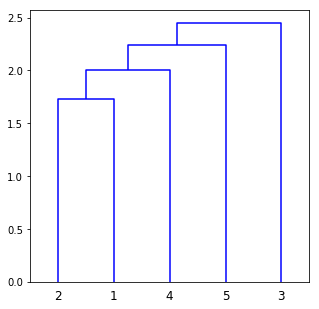

In [63]:
plt.show()

And there we go! Now, go back and check out the corresponding sentences, and you'll notice sentence 2 and 1 were pretty similar, while 3 was pretty out of place. (I mean, who's Bob? He's not even in the same country. 😂)

But anyways, that's how you perform hierarchical clustering.

Obviously, it's just as easy to perform Complete Linkage by changing "```single```" to "```complete```" in the instantiation of the linkage object. 

---------------------------------

# Stay Tuned For More Updates

Follow me on LinkedIn or GitHub to get a notification when I add more content to this mega blog post! 💙

----------------------------------

Authored by Aditya Ramesh

Follow me here -
* My Linkedin - https://www.linkedin.com/in/adityaramesh1998
* My Portfolio Website and Contact - https://www.rameshaditya.com/
* My GitHub Profile - https://www.github.com/RameshAditya/
